# **Lab 4: System of Linear Equations & Clustering**


# **Initialization**

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

# **System of Liear Equations**

**Determinants**

[Rule of Sarrus](https://en.wikipedia.org/wiki/Rule_of_Sarrus)

In [2]:
# numpy.linalg.det(array)

import numpy as np

def determinant_recursive(A):

    determinant = 0

    if A.shape[0] == 2 and A.shape[1] == 2:

        determinant = A[0][0] * A[1][1] - A[1][0] * A[0][1]

        return determinant

    else:

        for focus_column in range(len(A)):

            remaining_height = len(A[1:])

            A_sub = []

            for i in range(1, remaining_height+1):

                A_sub.append(np.append(A[i][0:focus_column],
                                       A[i][focus_column + 1:]))

            A_sub = np.array(A_sub)

            sign = (-1) ** (focus_column % 2)

            A_sub_determinant = determinant_recursive(A_sub)

            determinant += sign * A[0][focus_column] * A_sub_determinant

    return determinant  

def determinant_triangular(A):

  determinant = 1

  for i in range(len(A)):

    determinant = determinant * A[i][i]

  return determinant

In [3]:
A = np.array([[4, 3, 2, 2],
              [0, 1, -3, 3],
              [0, -1, 3, 3],
              [0, 3, 1, 1]], dtype=float)

print("Input Matrix")

print(A)

print("Determinant: {0}".format(determinant_recursive(A)))

A = np.array([[4, 3, 2, 2],
              [0, 1, -3, 3],
              [0, -1, 3, 3],
              [0, 3, 1, 1]], dtype=float)

print("Input Matrix")

print(A)

print("Determinant(numpy): {0}".format(np.linalg.det(A)))

B = np.array([[4, 3, 2, 2],
              [0, 1, -3, 3],
              [0, 0, 3, 3],
              [0, 0, 0, 1]], dtype=float)

print("Input Matrix")

print(B)

print("Determinant Upper Triangular: {0}".format(determinant_triangular(B)))

B = np.array([[4, 3, 2, 2],
              [0, 1, -3, 3],
              [0, 0, 3, 3],
              [0, 0, 0, 1]], dtype=float)

print("Input Matrix")

print(B)

print("Determinant Upper Triangular (numpy): {0}".format(np.linalg.det(B)))

C = np.array([[1, 0, 0, 0],
              [2, 1, 0, 0],
              [3, 6, 3, 0],
              [4, 5, 0, 1]], dtype=float)

print("Input Matrix")

print(C)

print("Determinant Lower Triangular: {0}".format(determinant_triangular(C)))

C = np.array([[1, 0, 0, 0],
              [2, 1, 0, 0],
              [3, 6, 3, 0],
              [4, 5, 0, 1]], dtype=float)

print("Input Matrix")

print(C)

print("Determinant Lower Triangular (numpy): {0}".format(np.linalg.det(C)))

Input Matrix
[[ 4.  3.  2.  2.]
 [ 0.  1. -3.  3.]
 [ 0. -1.  3.  3.]
 [ 0.  3.  1.  1.]]
Determinant: -240.0
Input Matrix
[[ 4.  3.  2.  2.]
 [ 0.  1. -3.  3.]
 [ 0. -1.  3.  3.]
 [ 0.  3.  1.  1.]]
Determinant(numpy): -240.0000000000002
Input Matrix
[[ 4.  3.  2.  2.]
 [ 0.  1. -3.  3.]
 [ 0.  0.  3.  3.]
 [ 0.  0.  0.  1.]]
Determinant Upper Triangular: 12.0
Input Matrix
[[ 4.  3.  2.  2.]
 [ 0.  1. -3.  3.]
 [ 0.  0.  3.  3.]
 [ 0.  0.  0.  1.]]
Determinant Upper Triangular (numpy): 12.0
Input Matrix
[[1. 0. 0. 0.]
 [2. 1. 0. 0.]
 [3. 6. 3. 0.]
 [4. 5. 0. 1.]]
Determinant Lower Triangular: 3.0
Input Matrix
[[1. 0. 0. 0.]
 [2. 1. 0. 0.]
 [3. 6. 3. 0.]
 [4. 5. 0. 1.]]
Determinant Lower Triangular (numpy): 2.999999999999999


**Cramer's Rule**

In [4]:
A = np.array([[0, 7, -1, 3, 1],
              [0, 3, 4, 1, 7],
              [6, 2, 0, 2, -1],
              [2, 1, 2, 0, 2],
              [3, 4, 1, -2, 1]], dtype=float)

print("Input Matrix")

print(A, A.shape)

b = np.array([5, 7, 2, 3, 4], dtype=float)

print("Constant Vector")

print(b, b.shape)

Input Matrix
[[ 0.  7. -1.  3.  1.]
 [ 0.  3.  4.  1.  7.]
 [ 6.  2.  0.  2. -1.]
 [ 2.  1.  2.  0.  2.]
 [ 3.  4.  1. -2.  1.]] (5, 5)
Constant Vector
[5. 7. 2. 3. 4.] (5,)


In [5]:
def cramers_rule(A, b, n):

  determinant_A = determinant_recursive(A)

  if determinant_A != 0:

    input_A = A.copy()

    x = np.zeros(n, dtype=float)

    for i in range(n):

      A[:, i] = b

      x[i] = determinant_recursive(A)/determinant_A

      A = input_A.copy()

    return x

  else:

    print('Singular Matrix')

    print('Cramer\'s Rule can not be Applied')

In [6]:
x = cramers_rule(A, b, A.shape[0])

print("Solution")

print(x, x.shape)

Solution
[0.03076923 0.78461538 1.01538462 0.15384615 0.06153846] (5,)


**Gaussian Elimination**

1. Elimination 
  
  $a_{i, j} = a_{k, j} - a_{i, j}*\frac{a_{k, k}}{a_{i, k}}$

  where 
    
    $k=1,2,...,n-1$ 
    
    $i=k+1,....,n$

    $j=k,....,n$

2. Back Substitution 
  
  $x_{i} = b_{i}/a_{i,i}$

  when $i=n$

  $x_{i}=\frac{(b_{i}-\sum_{j=i+1}^{n}a_{i,j}*x_{j})}{a_{i,i}}$

  when $i=n-1, n-2, ....,1$




In [7]:
def forward_elimintaion_without_pivoting(A, b, n):

  for k in range(n-1):

    for i in range(k + 1, n):

      if A[i, k] == 0:

        continue

      else:

        factor = A[k, k]/A[i, k]

        for j in range(k, n):

          A[i, j] = A[k, j] - A[i, j] * factor

        b[i] = b[k] - b[i] * factor

  return A, b

def forward_elimintaion_with_partial_pivoting(A, b, n):

  for k in range(n-1):

    max_index = np.abs(A[k:,k]).argmax() + k

    if A[max_index, k] == 0:
      
      raise ValueError("Matrix is Singular.")

    if max_index != k:
            A[[k,max_index]] = A[[max_index, k]]
            b[[k,max_index]] = b[[max_index, k]]

    for i in range(k + 1, n):

      if A[i, k] == 0:

        continue

      else:

        factor = A[k, k]/A[i, k]

        for j in range(k, n):

          A[i, j] = A[k, j] - A[i, j] * factor

        b[i] = b[k] - b[i] * factor

  return A, b


def backward_substitution(A, b, n):

  x = np.zeros(n, dtype=float)

  x[n-1] = b[n-1]/A[n-1, n-1]

  for i in range(n-2, -1, -1):

    sum_a_x = 0

    for j in range(i + 1, n):

      sum_a_x = sum_a_x + A[i, j] * x[j]

    x[i] = (b[i] - sum_a_x)/A[i, i]

  return x

In [8]:
A = np.array([[3, -2, 5, 0],
              [4, 5, 8, 1],
              [1, 1, 2, 1],
              [2, 7, 6, 5]], dtype=float)

print("Input Matrix")

print(A, A.shape)

b_1 = np.array([2, 4, 5, 7], dtype=float)

print("Constant Vector")

print(b_1, b_1.shape)

B = np.array([[0, 7, -1, 3, 1],
              [0, 3, 4, 1, 7],
              [6, 2, 0, 2, -1],
              [2, 1, 2, 0, 2],
              [3, 4, 1, -2, 1]], dtype=float)

print("Input Matrix")

print(B, B.shape)

b_2 = np.array([5, 7, 2, 3, 4], dtype=float)

print("Constant Vector")

print(b_2, b_2.shape)

Input Matrix
[[ 3. -2.  5.  0.]
 [ 4.  5.  8.  1.]
 [ 1.  1.  2.  1.]
 [ 2.  7.  6.  5.]] (4, 4)
Constant Vector
[2. 4. 5. 7.] (4,)
Input Matrix
[[ 0.  7. -1.  3.  1.]
 [ 0.  3.  4.  1.  7.]
 [ 6.  2.  0.  2. -1.]
 [ 2.  1.  2.  0.  2.]
 [ 3.  4.  1. -2.  1.]] (5, 5)
Constant Vector
[5. 7. 2. 3. 4.] (5,)


In [9]:
# without pivoting

A = np.array([[3, -2, 5, 0],
              [4, 5, 8, 1],
              [1, 1, 2, 1],
              [2, 7, 6, 5]], dtype=float)

print("Input Matrix")

print(A, A.shape)

b_1 = np.array([2, 4, 5, 7], dtype=float)

print("Constant Vector")

print(b_1, b_1.shape)

A, b = forward_elimintaion_without_pivoting(A, b_1, A.shape[0])

print('Row Echelon Form of Input Matrix')

print(A, A.shape)

print('Row Echelon Form of Constants')

print(b, b.shape)

x = backward_substitution(A, b, A.shape[0])

print("Solution")

print(x, x.shape)

# with partial pivoting

B = np.array([[0, 7, -1, 3, 1],
              [0, 3, 4, 1, 7],
              [6, 2, 0, 2, -1],
              [2, 1, 2, 0, 2],
              [3, 4, 1, -2, 1]], dtype=float)

print("Input Matrix")

print(B, B.shape)

b_2 = np.array([5, 7, 2, 3, 4], dtype=float)

print("Constant Vector")

print(b_2, b_2.shape)

B, b = forward_elimintaion_with_partial_pivoting(B, b_2, B.shape[0])

print('Row Echelon Form of Input Matrix')

print(B, B.shape)

print('Row Echelon Form of Constants')

print(b, b.shape)

x = backward_substitution(B, b, B.shape[0])

print("Solution")

print(x, x.shape)

C = np.array([[4, 3, 2, 2],
              [1, 1, -3, 3],
              [0, -1, 3, 3],
              [10, 3, 1, 1]], dtype=float)

print("Input Matrix")

print(C)

b_3 = np.array([5, 7, 2, 3], dtype=float)

print("Constant Vector")

print(b_3, b_3.shape)

C, b = forward_elimintaion_with_partial_pivoting(C, b_3, C.shape[0])

print('Row Echelon Form of Input Matrix')

print(C, C.shape)

print('Row Echelon Form of Constants')

print(b, b.shape)

x = backward_substitution(C, b, C.shape[0])

print("Solution")

print(x, x.shape)

Input Matrix
[[ 3. -2.  5.  0.]
 [ 4.  5.  8.  1.]
 [ 1.  1.  2.  1.]
 [ 2.  7.  6.  5.]] (4, 4)
Constant Vector
[2. 4. 5. 7.] (4,)
Row Echelon Form of Input Matrix
[[ 3.         -2.          5.          0.        ]
 [ 0.         -5.75       -1.         -0.75      ]
 [ 0.          0.          0.15        2.7       ]
 [ 0.          0.          0.          2.21785714]] (4, 4)
Row Echelon Form of Constants
[ 2.         -1.         13.95       13.43035714] (4,)
Solution
[ 28.77777778   2.16666667 -16.           6.05555556] (4,)
Input Matrix
[[ 0.  7. -1.  3.  1.]
 [ 0.  3.  4.  1.  7.]
 [ 6.  2.  0.  2. -1.]
 [ 2.  1.  2.  0.  2.]
 [ 3.  4.  1. -2.  1.]] (5, 5)
Constant Vector
[5. 7. 2. 3. 4.] (5,)
Row Echelon Form of Input Matrix
[[   6.            2.            0.            2.           -1.        ]
 [   0.            7.           -1.            3.            1.        ]
 [   0.            0.          -43.           17.          -48.        ]
 [   0.            0.            0.         

**Gauss-Jordan Elimination**

1. Transformation of the pivot row 

  $a^{*}_{k, j} = \frac{a_{k, j}}{a_{k, k}}$  
  $b^{*}_{k} = \frac{b_{k}}{a_{k, k}}$

  where 
    
    $k=1,2,...,n$ 

    $j=k,....,n$

2. Transformation of the non-pivot rows

  $a^{*}_{i, j} = a_{i, j} - a_{i, k}*a^{*}_{k, j}$  

  where 
    
    $k=1,2,...,n$ 
    
    $i=1,....,n$ $i \neq j$

    $j=k,....,n$
  
* Note
1. if $a_{i,k}=0$ then skip row $i$
2. Apply partial pivoting at each elimination

In [10]:
def gauss_jordar_elimination_with_partial_pivoting(A, b, n):

  for k in range(n):

    # partial pivoting

    max_index = np.abs(A[k:,k]).argmax() + k

    if A[max_index, k] == 0:
      
      raise ValueError("Matrix is Singular.")

    if max_index != k:
            A[[k,max_index]] = A[[max_index, k]]
            b[[k,max_index]] = b[[max_index, k]]

    # division of the pivot row

    pivot = A[k, k]

    for j in range(k, n):

      A[k, j] = A[k, j]/pivot
    
    b[k] = b[k]/pivot

    # elimination

    for i in range(n):

      if i==k or A[i,k] == 0:

        continue

      else:

        factor = A[i, k]

        for j in range(k, n):

          A[i, j] = A[i, j] - A[k, j] * factor

        b[i] = b[i] - b[k] * factor

  return A, b

In [11]:
A = np.array([[0, 7, -1, 3, 1],
              [0, 3, 4, 1, 7],
              [6, 2, 0, 2, -1],
              [2, 1, 2, 0, 2],
              [3, 4, 1, -2, 1]], dtype=float)

print("Input Matrix")

print(A, A.shape)

b = np.array([5, 7, 2, 3, 4], dtype=float)

print("Constant Vector")

print(b, b.shape)

A, b = gauss_jordar_elimination_with_partial_pivoting(A, b, A.shape[0])

print('Reduced Row Echelon Form of Input Matrix')

print(A, A.shape)

print('Reduced Row Echelon Form of Constants')

print(b, b.shape)


Input Matrix
[[ 0.  7. -1.  3.  1.]
 [ 0.  3.  4.  1.  7.]
 [ 6.  2.  0.  2. -1.]
 [ 2.  1.  2.  0.  2.]
 [ 3.  4.  1. -2.  1.]] (5, 5)
Constant Vector
[5. 7. 2. 3. 4.] (5,)
Reduced Row Echelon Form of Input Matrix
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]] (5, 5)
Reduced Row Echelon Form of Constants
[0.03076923 0.78461538 1.01538462 0.15384615 0.06153846] (5,)


**Row Echelon & Reduced Row Echelon Form**

In [12]:
def reduced_row_echelon_form(A):

  number_of_rows = A.shape[0]

  number_of_columns = A.shape[1]

  if number_of_rows == 0 or number_of_columns == 0:

    return A

  lead = 0

  for k in range(number_of_rows):

    if number_of_columns <= lead:
      
      return A

    # partial pivoting

    max_index = np.abs(A[k:,lead]).argmax() + k    

    if A[max_index, k] == 0:
      
      print("Matrix is Singular.")

      return A

    if max_index != k:

            A[[k,max_index]] = A[[max_index, k]]

    # division of the pivot row

    pivot = A[k, k]

    for j in range(k, number_of_columns):

      A[k, j] = A[k, j]/pivot

    # elimination

    for i in range(number_of_rows):

      if i==k or A[i,k] == 0:

        continue

      else:

        factor = A[i, k]

        for j in range(k, A.shape[1]):

          A[i, j] = A[i, j] - A[k, j] * factor

    lead = lead + 1

  return A



In [13]:
A = np.array([[0, 7, -1, 3, 1],
              [0, 3, 4, 1, 7],
              [6, 2, 0, 2, -1],
              [2, 1, 2, 0, 2],
              [3, 4, 1, -2, 1]], dtype=float)

print("Input Matrix")

print(A, A.shape)

A = reduced_row_echelon_form(A)

print('Reduced Row Echelon Form of Input Matrix')

print(A, A.shape)

B = np.array([[0, 7, -1, 3, 1],
              [0, 3, 4, 1, 7],
              [6, 2, 0, 2, -1],
              [2, 1, 2, 0, 2],
              [3, 4, 1, -2, 1],
              [1, 4, 1, -2, 5]], dtype=float)

print("Input Matrix")

print(B, B.shape)

B = reduced_row_echelon_form(B)

print('Reduced Row Echelon Form of Input Matrix')

print(B, B.shape)

C = np.array([[0, 7, -1, 3, 1],
              [6, 2, 0, 2, -1],
              [6, 2, 0, 2, -1]], dtype=float)

print("Input Matrix")

print(C, C.shape)

C = reduced_row_echelon_form(C)

print('Reduced Row Echelon Form of Input Matrix')

print(C, C.shape)

Input Matrix
[[ 0.  7. -1.  3.  1.]
 [ 0.  3.  4.  1.  7.]
 [ 6.  2.  0.  2. -1.]
 [ 2.  1.  2.  0.  2.]
 [ 3.  4.  1. -2.  1.]] (5, 5)
Reduced Row Echelon Form of Input Matrix
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]] (5, 5)
Input Matrix
[[ 0.  7. -1.  3.  1.]
 [ 0.  3.  4.  1.  7.]
 [ 6.  2.  0.  2. -1.]
 [ 2.  1.  2.  0.  2.]
 [ 3.  4.  1. -2.  1.]
 [ 1.  4.  1. -2.  5.]] (6, 5)
Reduced Row Echelon Form of Input Matrix
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]] (6, 5)
Input Matrix
[[ 0.  7. -1.  3.  1.]
 [ 6.  2.  0.  2. -1.]
 [ 6.  2.  0.  2. -1.]] (3, 5)
Matrix is Singular.
Reduced Row Echelon Form of Input Matrix
[[ 1.          0.          0.04761905  0.19047619 -0.21428571]
 [ 0.          1.         -0.14285714  0.42857143  0.14285714]
 [ 0.          0.          0.          0.          0.        ]] (3, 5)


# **System of Linear Equations Problems**

1. Implement a faster way to calculate the determinant of a matrix. [Hint: Triangular Matrix]

In [14]:
# fix it

def determinant_fast(A):

  n = A.shape[0]

  for k in range(n):

    max_index = np.abs(A[k:,k]).argmax() + k

    if A[max_index, k] == 0:
      
      return 0

    if max_index != k:

            A[[k,max_index]] = A[[max_index, k]]

    for i in range(k + 1, n):

      if A[i, k] == 0:

        continue

      else:

        #factor = A[k, k]/A[i, k]

        factor = A[i, k]/A[k, k]

        for j in range(k, n):

          #A[i, j] = A[k, j] - A[i, j] * factor
          
          A[i, j] = A[i, j] - A[k, j] * factor

  determinant = 1

  for i in range(len(A)):
    
    determinant = determinant * A[i][i]

  return A, determinant

In [15]:
A = np.array([[4, 3, 2, 2],
              [1, 1, -3, 3],
              [0, -1, 3, 3],
              [10, 3, 1, 1]], dtype=float)

print("Input Matrix")

print(A)

A, determinant = determinant_fast(A)

print('Row Echelon form of Input')

print(A)

print("Determinant: {0}".format(determinant))

A = np.array([[4, 3, 2, 2],
              [1, 1, -3, 3],
              [0, -1, 3, 3],
              [10, 3, 1, 1]], dtype=float)

print("Input Matrix")

print(A)

print("Determinant(numpy): {0}".format(np.linalg.det(A)))

Input Matrix
[[ 4.  3.  2.  2.]
 [ 1.  1. -3.  3.]
 [ 0. -1.  3.  3.]
 [10.  3.  1.  1.]]
Row Echelon form of Input
[[10.          3.          1.          1.        ]
 [ 0.          1.8         1.6         1.6       ]
 [ 0.          0.          3.88888889  3.88888889]
 [ 0.          0.          0.          6.        ]]
Determinant: 420.0
Input Matrix
[[ 4.  3.  2.  2.]
 [ 1.  1. -3.  3.]
 [ 0. -1.  3.  3.]
 [10.  3.  1.  1.]]
Determinant(numpy): 420.00000000000034


# **Clustering**

1. Load the book data.

In [16]:
# instead of reading the values from the bookprice.txt 
# let's assume that the values are already read.

book_price = np.array([[166, 54],
                       [195, 82],
                       [200, 72],
                       [260, 72],
                       [265, 90],
                       [335, 124],
                       [370, 94],
                       [450, 118],
                       [517, 152],
                       [552, 132]])

print(book_price, book_price.size, type(book_price), book_price.shape)

[[166  54]
 [195  82]
 [200  72]
 [260  72]
 [265  90]
 [335 124]
 [370  94]
 [450 118]
 [517 152]
 [552 132]] 20 <class 'numpy.ndarray'> (10, 2)


2. Seperate the data in x and y vector for plotting.

In [17]:
x = book_price[:, 0]

y = book_price[:, 1]

3. Plot the data points

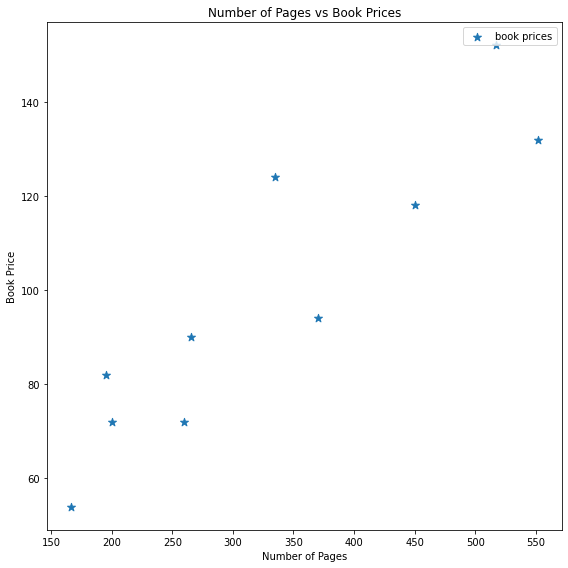

In [18]:
fig_width = 8

fig_height = 8

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(fig_width, fig_height))

ax.set_xlabel('Number of Pages')

ax.set_ylabel('Book Price')

ax.set_title('Number of Pages vs Book Prices')

ax.scatter(x,
           y,
           label='book prices',
           marker='*',
           s = 70)

plt.legend()

plt.tight_layout()

plt.show()

4. Set the number of cluster, $k=3$

In [19]:
k = 3

5. Generate k random number from $[0, data\_size)$

In [20]:
def generate_k_random_numbers(k, n, log):

  sample_indices = random.sample(range(n), k)

  if log:

    print('Initial Random Indices {}:'.format(sample_indices))

  return sample_indices

6. Take $k$ data points to represent as centroids using the random indices generated above.

In [21]:
def get_centroid_seeds(data_points, indices, log):

  centroids = np.array(data_points[indices, :])

  if log:
    
    print('Selected Centroids: {}'.format(centroids))

  return centroids

7. Write a function to calucate the Eucledian Distance.

In [22]:
def eucledian_distance(a, b):

  # Frobenius Norm

  return np.linalg.norm(a-b)

8. Write a function that will find the index of the closest centroid from a data point.

In [23]:
def get_closest_centroid_index(data_point, centroids, log):
  
  distances = [eucledian_distance(data_point, centroid) for centroid in centroids]

  closest_centroid_index = np.argmin(distances)

  if log:

    print("Closest Centroid Index of {0} is {1}".format(data_point, closest_centroid_index))

  return closest_centroid_index

9. Write a function to create k initial clusters.

In [24]:
def create_clusters(data_points, centroids, k, log):

  clusters = [[] for _ in range(k)]

  for data_point_index, data_point in enumerate(data_points):

    closest_centroid_index = get_closest_centroid_index(data_point, centroids, log)

    clusters[closest_centroid_index].append(data_point_index)

  if log:

    print("Clusters: {0}".format(clusters))

  return clusters

10. Write a function that will update the centroids.

In [25]:
def update_centroid(data_points, clusters, k, log):

  number_of_features = data_points.shape[1]

  centroids = np.zeros((k, number_of_features))

  for cluster_index, cluster in enumerate(clusters):  

    cluster_mean = np.mean(data_points[cluster], axis=0)

    centroids[cluster_index] = cluster_mean

  if log:

    print("Centroids: {0}".format(centroids))

  return centroids

11. Write a function that will check the convergence of the algorithm.

In [26]:
def is_converged(previous_centroids, centroids, k, iteration):

  errors = [eucledian_distance(previous_centroids[i], centroids[i]) for i in range(k)]

  print("Error on {0}th Iteration is {1}".format(iteration, sum(errors)))

  return sum(errors) == 0, sum(errors)

12. Write a function that will return a list containing the corresponding label(cluster number) of each data points.

In [27]:
def get_labels(clusters, n, log):

  labels = np.zeros(n)

  for cluster_index, cluster in enumerate(clusters):

    for data_point_index in cluster:

      labels[data_point_index] = cluster_index

  if log:

    print('Labels: {0}'.format(labels))

  return labels

14. Write a plot function that will change show the current state of clustering.

In [28]:
def plot(data_points, clusters, centroids):

  fig_width = 8

  fig_height = 8

  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(fig_width, fig_height))

  ax.set_xlabel('Number of Pages')

  ax.set_ylabel('Book Price')

  ax.set_title('Number of Pages vs Book Prices')

  for i, index in enumerate(clusters):
    
    point = data_points[index].T
    
    ax.scatter(*point)

  for point in centroids:

      ax.scatter(*point, 
                 marker="x",
                 s = 100, 
                 color="black", 
                 linewidth=2)

  # plt.legend()

  plt.tight_layout()

  plt.show()

14. Write a function that will perfom the K-Mean clustering on the given data points.

In [29]:
def k_means(data_points, k, iteration_threshold, plot_data_points, log):

  # generating k random indices for picking the centroid seeds
  sample_indices = generate_k_random_numbers(k, data_points.shape[0], log)

  print('{0} Random Indices Generated'.format(len(sample_indices)))

  # selecting data points as centroids based on the random indices
  centroids = get_centroid_seeds(data_points, sample_indices, log)

  print('{0} Centroid(s) [Seed] Selected'.format(len(centroids)))

  errors = []
  
  # optimization process
  for i in range(iteration_threshold):

    # creating/updating clusters
    clusters = create_clusters(data_points, centroids, k, log)

    if plot_data_points:

      plot(data_points, clusters, centroids)

    # keeping a copy of the previous centroid
    previous_centroids = centroids.copy()

    # updating centroids
    centroids = update_centroid(data_points, clusters, k, log)

    # checking for convergence

    converged, current_error = is_converged(previous_centroids, centroids, k, i)

    errors.append(current_error)

    if converged:

      break

  # get label for each data point

  labels = get_labels(clusters, data_points.shape[0], log)

  return labels, centroids, clusters, errors

Initial Random Indices [7, 6, 1]:
3 Random Indices Generated
Selected Centroids: [[450 118]
 [370  94]
 [195  82]]
3 Centroid(s) [Seed] Selected
Closest Centroid Index of [166  54] is 2
Closest Centroid Index of [195  82] is 2
Closest Centroid Index of [200  72] is 2
Closest Centroid Index of [260  72] is 2
Closest Centroid Index of [265  90] is 2
Closest Centroid Index of [335 124] is 1
Closest Centroid Index of [370  94] is 1
Closest Centroid Index of [450 118] is 0
Closest Centroid Index of [517 152] is 0
Closest Centroid Index of [552 132] is 0
Clusters: [[7, 8, 9], [5, 6], [0, 1, 2, 3, 4]]


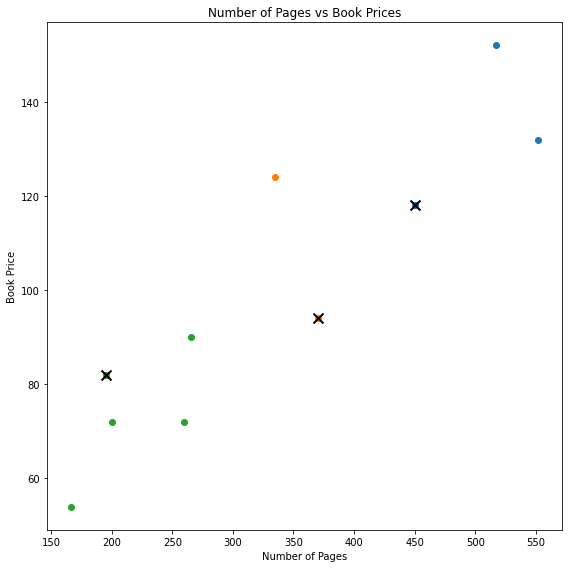

Centroids: [[506.33333333 134.        ]
 [352.5        109.        ]
 [217.2         74.        ]]
Error on 0th Iteration is 105.2077773280377
Closest Centroid Index of [166  54] is 2
Closest Centroid Index of [195  82] is 2
Closest Centroid Index of [200  72] is 2
Closest Centroid Index of [260  72] is 2
Closest Centroid Index of [265  90] is 2
Closest Centroid Index of [335 124] is 1
Closest Centroid Index of [370  94] is 1
Closest Centroid Index of [450 118] is 0
Closest Centroid Index of [517 152] is 0
Closest Centroid Index of [552 132] is 0
Clusters: [[7, 8, 9], [5, 6], [0, 1, 2, 3, 4]]


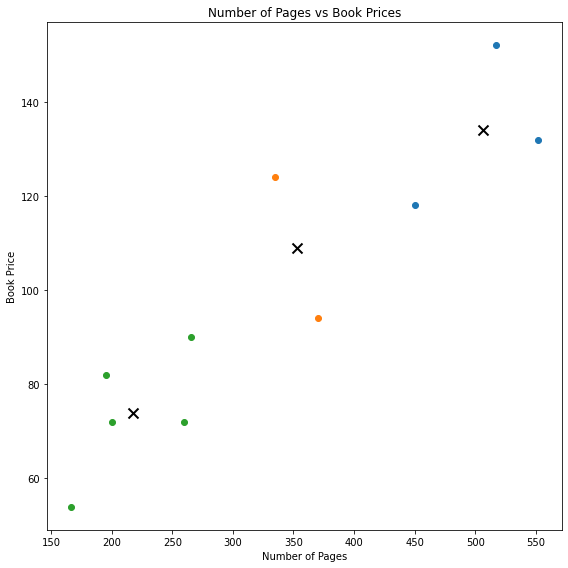

Centroids: [[506.33333333 134.        ]
 [352.5        109.        ]
 [217.2         74.        ]]
Error on 1th Iteration is 0.0
Labels: [2. 2. 2. 2. 2. 1. 1. 0. 0. 0.]


In [30]:
labels, centroids, clusters, errors = k_means(book_price, 
                                              k, 
                                              100, 
                                              True, 
                                              True)

15. Plot the points again and change the color of the points based on their labels. Moreover, also plot the errors.

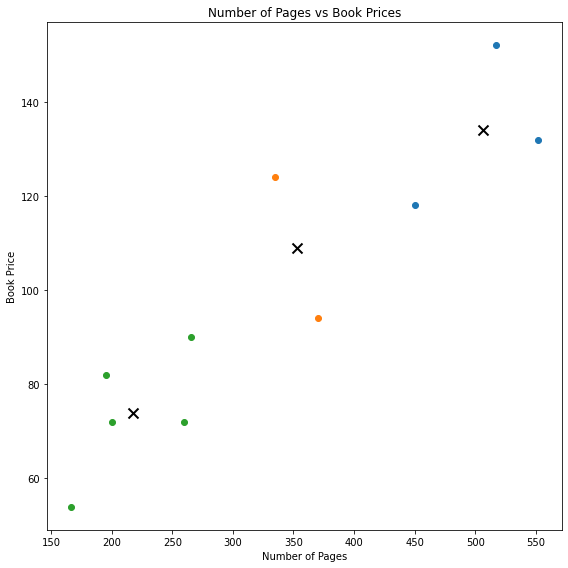

In [31]:
plot(book_price, clusters, centroids)

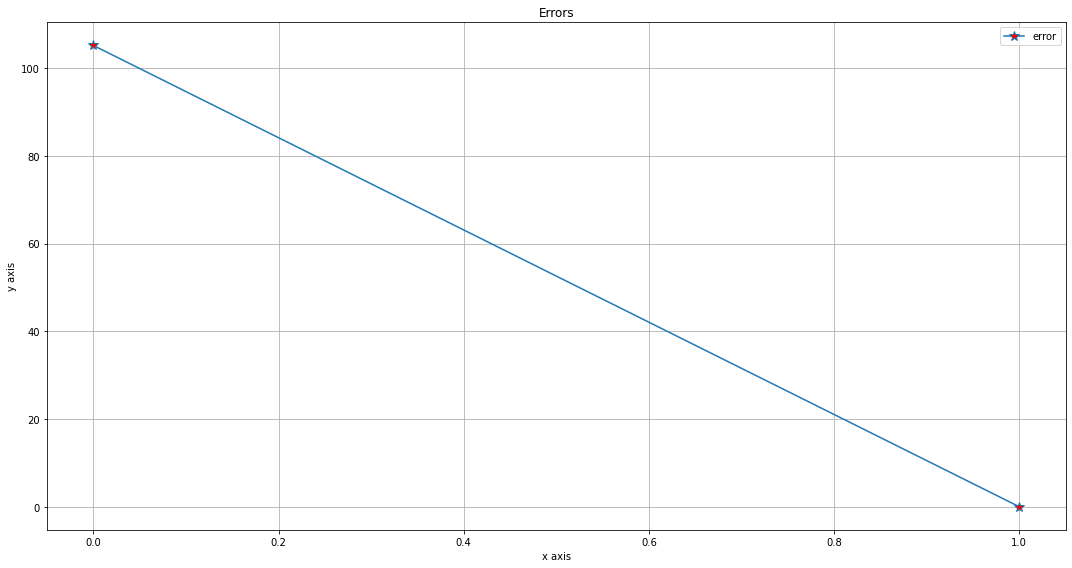

In [32]:
x = np.arange(len(errors))

error = errors

fig_width = 15

fig_height = 8

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(fig_width, fig_height))

ax.set_xlabel('x axis')

ax.set_ylabel('y axis')

ax.set_title('Errors')

ax.plot(x,
        error,
        label='error',
        marker='*',
        markersize=10,
        MarkerFaceColor='r')

plt.legend()

plt.grid()

plt.tight_layout()

plt.show()

16. Generate n random m feature vectors and run k mean on them for a suitable k.

In [33]:
n = 200
m = 2
k = 6

In [34]:
data_points = np.random.rand(n, m)

print(data_points)

[[9.73217767e-01 5.32099258e-01]
 [8.13306306e-01 4.27698055e-01]
 [6.49072498e-01 1.65399247e-02]
 [3.47106522e-01 2.68274820e-02]
 [1.99467418e-02 1.32786801e-01]
 [9.28300654e-01 7.69286264e-02]
 [6.13680870e-01 2.86039096e-02]
 [7.16220178e-01 6.34899867e-01]
 [3.77300732e-03 7.18886803e-02]
 [6.39268462e-01 4.59516525e-01]
 [9.37426378e-01 2.20031125e-01]
 [3.98834407e-01 7.28596557e-01]
 [8.58729805e-01 2.97500533e-02]
 [4.24376222e-01 4.17868755e-01]
 [8.83948964e-02 2.64171548e-01]
 [1.07571615e-01 1.28115730e-01]
 [6.29559632e-01 1.97419241e-01]
 [8.44288487e-01 6.31365302e-01]
 [1.04025247e-01 4.36283592e-01]
 [5.50853666e-01 6.27044751e-01]
 [6.00487123e-01 3.58125427e-01]
 [5.23396267e-01 7.84129795e-01]
 [5.29355126e-01 3.31044864e-01]
 [5.76100375e-01 4.80817176e-01]
 [1.22527628e-01 9.46387098e-01]
 [1.55855261e-01 3.67697684e-01]
 [7.22980436e-01 6.59669790e-01]
 [5.58420690e-01 6.73210838e-01]
 [6.90458631e-01 6.44279281e-02]
 [5.54660521e-01 7.25004629e-01]
 [1.877812

In [35]:
x = data_points[:, 0]

y = data_points[:, 1]

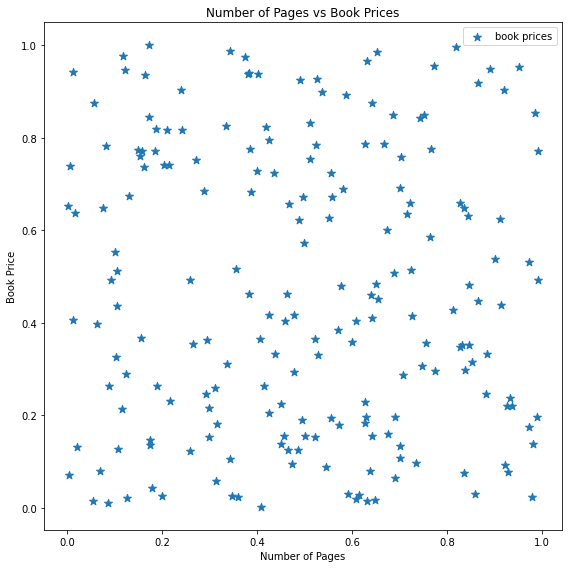

In [36]:
fig_width = 8

fig_height = 8

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(fig_width, fig_height))

ax.set_xlabel('Number of Pages')

ax.set_ylabel('Book Price')

ax.set_title('Number of Pages vs Book Prices')

ax.scatter(x,
           y,
           label='book prices',
           marker='*',
           s = 70)

plt.legend()

plt.tight_layout()

plt.show()

6 Random Indices Generated
6 Centroid(s) [Seed] Selected


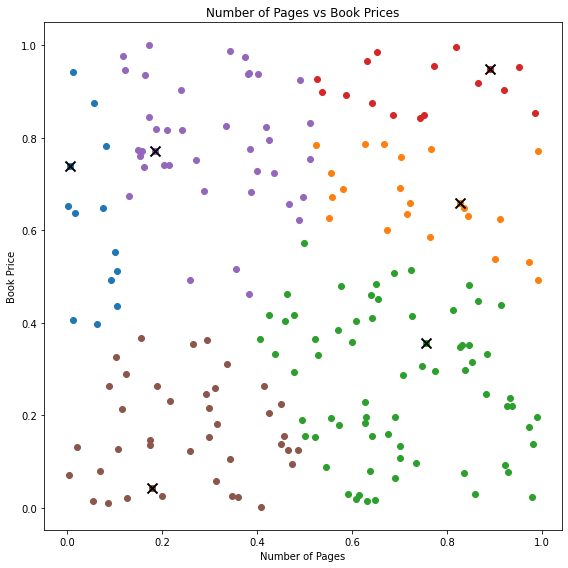

Error on 0th Iteration is 0.728189476049965


Error on 1th Iteration is 0.1299019786969138


KeyboardInterrupt: ignored

In [37]:
labels, centroids, clusters, errors = k_means(data_points, 
                                              k, 
                                              100, 
                                              True, 
                                              False)

In [ ]:
plot(data_points, clusters, centroids)

In [ ]:
x = np.arange(len(errors))

error = errors

fig_width = 15

fig_height = 8

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(fig_width, fig_height))

ax.set_xlabel('x axis')

ax.set_ylabel('y axis')

ax.set_title('Errors')

ax.plot(x,
        error,
        label='error',
        marker='*',
        markersize=10,
        MarkerFaceColor='r')

plt.legend()

plt.grid()

plt.tight_layout()

plt.show()

# **MNIST Dataset Clustering Problem**

1. Download and Load the MNIST Dataset of handwritten digits.

  [MNIST Main](http://yann.lecun.com/exdb/mnist/)
  
  [MNIST Wiki](https://en.wikipedia.org/wiki/MNIST_database)

In [ ]:
from keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Shape of the Dataset

print("Training: {0}".format(X_train.shape))

print("Test:     {0}".format(X_test.shape))

2. Take a sample of the dataset for faster development if needed. For example, 5000.

In [ ]:
X_train = X_train[0:5000]

Y_train = Y_train[0:5000]

print(X_train.shape)

3. Plot some sample images from the MNIST Dataset

In [ ]:
fig_width = 6

fig_height = 6

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(fig_width, fig_height))

for i, ax in enumerate(ax.flat):

    ax.imshow(X_train[i])

    ax.axis('off')

    ax.set_title('Digit {0}'.format(Y_train[i]))

plt.tight_layout()

plt.gray()

plt.show()

4.  Each of the images are 2 dimensional here however we will need 1 dimensional vectors. Write a function that will flatten the 2 dimensional images into 1 dimensional vectos.

In [ ]:
def reshape_data_points(data_points):
  
  data_points = data_points.reshape(len(data_points), -1)

  return data_points

print(X_train.shape)

X_train = reshape_data_points(X_train)

X_test = reshape_data_points(X_test)

print(X_train.shape)

5. Normalize the dataset by dividing the dataset by the maximum possible pixel intensity value. e.g 255.

In [ ]:
def normalize_data_points(data_points, value):

  data_points = data_points.astype(np.float32) / value

  return data_points

X_train = normalize_data_points(X_train, 255)

X_test = normalize_data_points(X_test, 255)

6. Apply the K-Means Clustering on the image dataset.

In [ ]:
k = 10

In [ ]:
labels, centroids, clusters, errors = k_means(X_train, 
                                              k, 
                                              10, 
                                              False, 
                                              False)

7. Plot the Errors

In [ ]:
x = np.arange(len(errors))

error = errors

fig_width = 15

fig_height = 8

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(fig_width, fig_height))

ax.set_xlabel('x axis')

ax.set_ylabel('y axis')

ax.set_title('Errors')

ax.plot(x,
        error,
        label='error',
        marker='*',
        markersize=10,
        MarkerFaceColor='r')

plt.legend()

plt.grid()

plt.tight_layout()

plt.show()

  The found labels are not the real labels of each image. Here label is just a cluster id nothing else. For example, 2 in kmeans label means that has similar features with another object in the same group 2.

8. Calculate the frequency distribution of the actual label in each cluster.

In [ ]:
def estimate_cluster_labels(data_point_labels, labels, k):

  estimated_cluster_labels = {}

  for i in range(k):

    current_cluster_labels = []

    indices = np.where(labels == i)

    current_cluster_labels.extend(data_point_labels[indices])

    label_count = np.bincount(current_cluster_labels)

    estimated_cluster_label = np.argmax(label_count)

    if estimated_cluster_label in estimated_cluster_labels:

      estimated_cluster_labels[estimated_cluster_label].append(i)

    else:

      estimated_cluster_labels[estimated_cluster_label] = [i]

  return estimated_cluster_labels

estimated_cluster_labels = estimate_cluster_labels(Y_train, labels, k)

print(estimated_cluster_labels)


9. Write a function that can infer the data label

In [ ]:
def infer_labels(labels, estimated_cluster_labels):

  predicted_labels = np.zeros(len(labels), dtype=int)

  for i, label in enumerate(labels):

    for key, value in estimated_cluster_labels.items():

      if label in value:

        predicted_labels[i]=key

  return predicted_labels

predicted_labels = infer_labels(labels, estimated_cluster_labels)

print(predicted_labels)

10. Write a function that will find the error between the true label and the estimated label

In [ ]:
import sklearn.metrics

def accuracy(data_point_labels, predicted_labels):

  difference = data_point_labels - predicted_labels

  accuracy_score = sklearn.metrics.accuracy_score(data_point_labels, predicted_labels)

  return accuracy_score

calculated_accracy = accuracy(Y_train, predicted_labels)

print('Training Accuracy: {0:.2f}%'.format(calculated_accracy*100))

11. Write a function that will optimize the value of k.

In [ ]:
def optimize_k(k_values, data_points, data_point_labels, iteration_number):

  errors_list = []

  accuracy_list = []

  best_accuracy = 0

  optimal_k = None

  output = None

  for i, current_k in enumerate(k_values):

    print('Optimization Step: {0}'.format(i))

    labels, centroids, clusters, errors = k_means(data_points, 
                                                  current_k, 
                                                  iteration_number, 
                                                  False, 
                                                  False)
    
    errors_list.append(errors)

    estimated_cluster_labels = estimate_cluster_labels(data_point_labels, labels, current_k)

    predicted_labels = infer_labels(labels, estimated_cluster_labels)

    current_accuracy = accuracy(data_point_labels, predicted_labels)

    accuracy_list.append(current_accuracy*100)

    print('Number of Cluster: {0}'.format(current_k))

    print('Training Accuracy: {0}%'.format(current_accuracy*100))

    if current_accuracy > best_accuracy:

      optimal_k = current_k

      output = [labels, centroids, clusters, errors]

  x = np.arange(len(k_values))

  fig_width = 15

  fig_height = 8

  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(fig_width, fig_height))

  ax.set_xlabel('x axis')

  ax.set_ylabel('y axis')

  ax.set_title('K vs Accuracy')

  ax.plot(x,
          accuracy_list,
          label='Training Accuracy',
          marker='*',
          markersize=10,
          MarkerFaceColor='r')
  
  ax.plot(x,
          k_values,
          label='k',
          marker='*',
          markersize=10,
          MarkerFaceColor='r')

  plt.legend()

  plt.grid()

  plt.tight_layout()

  plt.show()

  return optimal_k, labels, centroids, clusters, errors

optimal_k, labels, centroids, clusters, errors = optimize_k([10, 50, 100, 150, 200, 256],X_train[:1000], Y_train[:1000], 10)

print("Optimal K: {0}".format(optimal_k))

12. Run the K-Means Clustering algorithm using the optimal value of k.

In [ ]:
k = optimal_k

In [ ]:
labels, centroids, clusters, errors = k_means(X_train, 
                                              k, 
                                              10, 
                                              False, 
                                              False)
  
estimated_cluster_labels = estimate_cluster_labels(Y_train, labels, k)

predicted_labels = infer_labels(labels, estimated_cluster_labels)

current_accuracy = accuracy(Y_train, predicted_labels)

print('Number of Cluster: {0}'.format(k))

print('Training Accuracy: {0}%'.format(current_accuracy*100))

13. Show some of the training images along with their predicted label.

In [ ]:
n = 5000

normalization_value = 255

In [ ]:
images = X_train.reshape(n, 28, 28)

images = images * normalization_value

fig_width = 7

fig_height = 7

fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(fig_width, fig_height))

random_number_list = []

for i, ax in enumerate(ax.flat):

    random_number = np.random.randint(len(images))

    random_number_list.append(random_number)

    ax.imshow(images[random_number])

    ax.axis('off')

    ax.set_title('Inferred Label: {}'.format(predicted_labels[random_number]), color='blue')

print('Accuracy: {0}%'.format(accuracy(Y_train[random_number_list], predicted_labels[random_number_list])*100))

plt.tight_layout()

plt.gray()

plt.show()

14. Write a function that will test the testing data using the calculated clusters.

In [ ]:
def test_model(predicted_labels, centroids, X_test, Y_test):

  prediction_list = []

  true_value_list = []

  for i in range(X_test.shape[0]):

    closest_centroid_index = get_closest_centroid_index(X_test[i], centroids, False)

    for key, value in estimated_cluster_labels.items():

      if closest_centroid_index in value:

        prediction_list.append(key)

        true_value_list.append(Y_test[i])
  
  print("Testing Accuracy {0}%".format(accuracy(np.array(prediction_list), np.array(true_value_list))*100))

  return prediction_list, true_value_list


prediction_list, true_value_list = test_model(predicted_labels, centroids, X_test, Y_test)

Extra Reading
1. https://realpython.com/k-means-clustering-python/